In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [4]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 140s 8us/step


In [6]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [8]:
print(train_labels[0])

1


In [12]:
max([max(sequence) for sequence in train_data])

9999

In [15]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
#decode_review = ' '.join([reverse_word_index.get(i-3,'?') for in train_data[0]])

1646592/1641221 [==============================] - 41s 25us/step


In [16]:
decode_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])

In [17]:
import numpy as np

In [29]:
def vectorize_sequences(sequences,dimension=10000):
    result=np.zeros((len(sequences),dimension))
    for i,sequences in enumerate(sequences):
        result[i,sequences]=1
    return result

In [30]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [31]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [32]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [44]:
from keras import models
from keras import layers

In [45]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
from keras import optimizers

In [50]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

In [57]:
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [58]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 9s 614us/step - loss: 0.4976 - acc: 0.7953 - val_loss: 0.3717 - val_acc: 0.8722
Epoch 2/20
15000/15000 [==============================] - 4s 253us/step - loss: 0.2957 - acc: 0.9046 - val_loss: 0.2990 - val_acc: 0.8909
Epoch 3/20
15000/15000 [==============================] - 4s 235us/step - loss: 0.2160 - acc: 0.9286 - val_loss: 0.3088 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 4s 236us/step - loss: 0.1742 - acc: 0.9433 - val_loss: 0.2831 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 4s 234us/step - loss: 0.1415 - acc: 0.9542 - val_loss: 0.2863 - val_acc: 0.8851
Epoch 6/20
15000/15000 [==============================] - 3s 233us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3090 - val_acc: 0.8809
Epoch 7/20
15000/15000 [==============================] - 4s 233us/step - loss: 0.0970 - acc: 0.9709 - val_loss: 0.3147 - 

In [60]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [61]:
import matplotlib.pyplot as plt


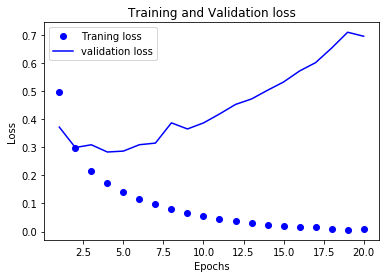

In [65]:
history_dict = history.history
loss_value=history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs=range(1,len(history_dict['acc'])+1)
plt.plot(epochs,loss_value,'bo',label='Traning loss')
plt.plot(epochs,val_loss_values,'b',label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

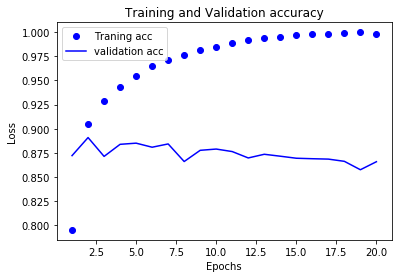

In [66]:
plt.clf()
acc_value=history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs,acc_value,'bo',label='Traning acc')
plt.plot(epochs,val_acc_values,'b',label='validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:
#Retraining Model from Scratch
model=models.Sequential()
model.add(layers.Dense(16,activation='relu' , input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [76]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [77]:
model.fit(x_train,y_train,epochs=4,batch_size=512)
result=model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 7s 290us/step - loss: 0.4466 - acc: 0.8246
Epoch 2/4
25000/25000 [==============================] - 5s 199us/step - loss: 0.2556 - acc: 0.9101
Epoch 3/4
25000/25000 [==============================] - 5s 204us/step - loss: 0.1968 - acc: 0.9300 4s - loss: 0.2005 - acc: 0.932 -
Epoch 4/4
25000/25000 [==============================] - 12s 491us/step


In [78]:
result

[0.3170736587333679, 0.87528]

In [79]:
model.predict(x_test)

array([[0.29587114],
       [0.9996728 ],
       [0.9396516 ],
       ...,
       [0.16444449],
       [0.15568557],
       [0.76027226]], dtype=float32)